# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 1</center></h1>
## <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Hai Nguyen</center></h1>
#### <h1><center>Due day: 11:00 pm, Thursday, 08, September, 2022 </center></h1>
### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.
### If you have questions, please submit them to [our piazza channel](piazza.com/utexas/fall2022/em397).

# **Question 1** (Linear regression for 2 linear features)

Loading UCI Diabetes Dataset and considering the *BMI* and *BP* features, denoted as $x_1, x_2$, respectively. The diabetes risk score is the target and denoted as $y$. We assuming the linear model has the form of

$$ \bar{y} = 0.4638 + \theta_1 x_1 + \theta_2 x_2.$$

The mean square error loss function

$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where $n$ is the number of patients, $y^i$ is the data for the $i$ th patient, and $\bar{y}^{(i)} = 0.4638 + \theta_1 x_1^i + \theta_2 x_2^i$. 

- (1.a) (+25 pt) Using the gradient descent algorithm to find the optimal $\theta_1$ and $\theta_2$. You need to use the pseudo code below as the skeleton/blueprint for your codes.

- (1.b) (+5 pt) Plotting the contours of the loss function over the square domain $[0,4]^2$

- (1.c) (+10 pt) Plotting  the history the gradient descent vector on the contour map from two initial guess $(\theta_1, \theta_2) = (4,4)$ and $(\theta_1, \theta_2) = (0,0)$. You can plot a vector for every 100 iterations.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(theta):
    return 0.4638+theta[0]*X_train['bmi']+theta[1]*X_train['bp']

def mean_squared_error(theta):
    J = 0.5*np.sum((y_train - f(theta)) ** 2)
    return J

def mse_gradient(theta):
    K = np.array([- np.sum ((y_train - f(theta)) * X_train['bmi']), - np.sum ((y_train - f(theta)) * X_train['bp'])])
    return K

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Collect 20 data points and use bmi and bp dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

threshold = 1e-6
step_size = 4e-1
theta_prev = np.array([1,1])


theta = theta_prev - step_size * mse_gradient(theta_prev)

while np.linalg.norm(theta - theta_prev) > threshold:

    step_size = 4e-1
    
    while (mean_squared_error(theta)>=mean_squared_error(theta_prev)):
        step_size = step_size/2
        theta_new = theta - step_size * mse_gradient(theta)
        theta_prev = theta
        theta = theta_new
        
    theta_new = theta - step_size * mse_gradient(theta)
    theta_prev = theta
    theta = theta_new

print(theta)
print(mean_squared_error([theta]))

[3.61289656 0.2278119 ]
0.60027760321994


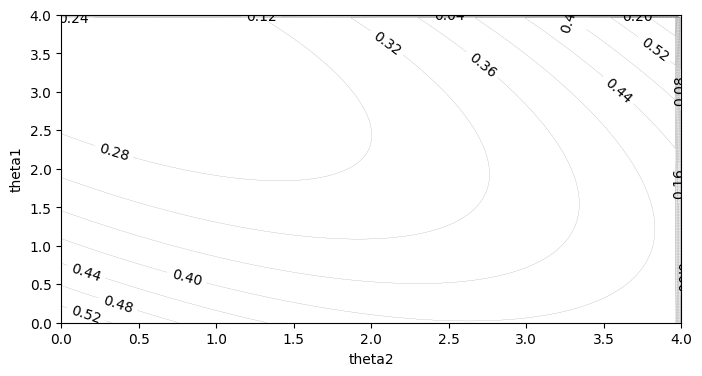

In [89]:
feature_x = np.linspace(0.0, 4.0,100)
feature_y = np.linspace(0.0, 4.0,100)
X,Y=np.meshgrid(feature_x,feature_y)
# Creating 2-D grid of features
Z=np.zeros((len(feature_x),len(feature_y)))

for i in range (0,99) :
    for j in range (0,99) :
            Z[i][j]=mean_squared_error([feature_x[i],feature_y[j]])

cp = plt.contour(X, Y, Z, 15, colors='black', linestyles='dashed', linewidths=0.1)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('theta1')
plt.ylabel('theta2')
plt.show()

[3.61289603 0.22781244]
0.24146963909428742


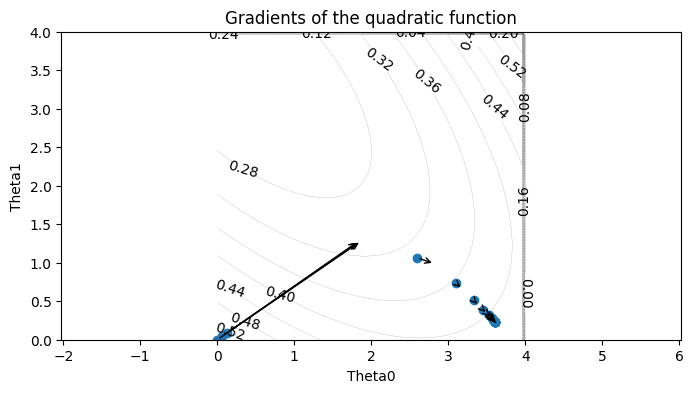

In [114]:
theta_prev = np.array([0,0])
theta_ini = np.array([0,0])
threshold = 1e-6
theta = theta_prev - step_size * mse_gradient(theta_prev)
A = np.array([theta_prev[0],theta[0]])
B = np.array([theta_prev[1],theta[1]])
C = np.array([mse_gradient(theta_prev)[0],mse_gradient(theta)[0]])
D = np.array([mse_gradient(theta_prev)[1],mse_gradient(theta)[1]])

k=0;
while np.linalg.norm(theta - theta_prev) > threshold:
    step_size = 4e-1
    theta_new = theta - step_size * mse_gradient(theta)
    theta_prev = theta
    theta = theta_new
    if k%100 == 0:
        A = np.append(A, theta[0]) 
        B = np.append(B, theta[1])
        C = np.append(C, mse_gradient(theta)[0])
        D = np.append(D, mse_gradient(theta)[1])
    k = k+1

feature_x = np.linspace(0.0, 4.0,100)
feature_y = np.linspace(0.0, 4.0,100)
X,Y=np.meshgrid(feature_x,feature_y)
# Creating 2-D grid of features
Z=np.zeros((len(feature_x),len(feature_y)))

for i in range (0,99) :
    for j in range (0,99) :
            Z[i][j]=mean_squared_error([feature_x[i],feature_y[j]])
            
            
line_length = 11
 
contours = plt.contour(X, Y, Z, 15, colors='black', linestyles='dashed', linewidths=0.1) 
for a, b, c, d in zip(A, B, C, D): 
    plt.annotate('', xytext=(a, b), xy=(a-line_length*c, 
                     b-line_length*d), 
                 arrowprops={'arrowstyle': '->', 'lw': 1}, va='center', ha='center') 
plt.scatter(A, B) 
plt.clabel(contours) 
plt.xlabel('Theta0') 
plt.ylabel('Theta1') 
plt.title('Gradients of the quadratic function') 
plt.axis('equal') 
print(theta)
print(mean_squared_error(theta))

## **Question 2** (Linear regression for 2 nonlinear features, Multivariate Polynomial Regression)

We still use the pairs of *BMI* and *BP* features ($x_1, x_2$). However, the linear model now is changed to

$$ \bar{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 + \theta_5 x_2^2$$

The mean square error loss function is still the same

$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\bar{y}^{(i)})^2$$
where again $n$ is the number of patients.

- (2.a) (+30 pt) Using the gradient descent algorithm to find the optimal $\theta_i, i = 0, ..., 5$. You need to use the pseudo code below as the skeleton/blueprint for your codes

In [142]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets

def f(theta):
    return theta[0]+theta[1]*X_train['bmi']+theta[2]*X_train['bp']+theta[3]*X_train['bmi']*X_train['bp']+theta[4]*X_train['bmi']*X_train['bmi']+theta[5]*X_train['bp']*X_train['bp']

def mean_squared_error(theta):
    J = 0.5*np.sum((y_train - f(theta)) ** 2)
    return J

def mse_gradient(theta):
    K1 = - np.sum (y_train - f(theta))
    K2 = - np.sum ((y_train - f(theta)) * X_train['bmi'])
    K3 = - np.sum ((y_train - f(theta)) * X_train['bp'])
    K4 = - np.sum ((y_train - f(theta)) * X_train['bmi']* X_train['bp'])
    K5 = - np.sum ((y_train - f(theta)) * X_train['bmi']* X_train['bmi'])
    K6 = - np.sum ((y_train - f(theta)) * X_train['bp']* X_train['bp'])
    K = np.array ([K1, K2, K3, K4, K5, K6])                                                                                                     
    return K

# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
# Collect 20 data points and use bmi and bp dimension
X_train = X.iloc[-20:].loc[:, ['bmi', 'bp']]
y_train = y.iloc[-20:] / 300

threshold = 1e-6
step_size = 4e-1
theta, theta_prev = np.array([0,0,0,0,0,0]), np.array([1,1,1,1,1,1])
iter = 0
theta_new = np.array([0,0,0,0,0,0])
while np.linalg.norm(theta - theta_prev) > threshold:
    step_size = 4e-1
    if iter > 20000:
        break
        
    while (mean_squared_error(theta)>=mean_squared_error(theta_prev)):
        step_size = step_size/2
        theta_new = theta - step_size * mse_gradient(theta)
        theta_prev = theta
        theta = theta_new
            
    theta_new = theta - (step_size * mse_gradient(theta))
    theta_prev = theta
    theta = theta_new
    iter = iter + 1
    
print(theta)
print(mean_squared_error(theta))

[ 0.383505    3.16527937  0.60380238 11.05139881 10.77206648 14.90658854]
0.16451489501747973
